<a href="https://colab.research.google.com/github/quantumseminar/textbook/blob/main/04gate/03gate2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q qiskit qiskit-aer pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 48.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 5.3 MB/s eta 0:00:00


In [9]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

## その他の1量子ビットゲート

### Sゲート
Z軸周りに90度回転

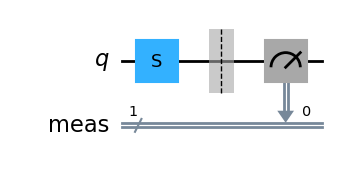

In [4]:
# 量子回路を準備
qc = QuantumCircuit(1)
qc.s(0)
qc.measure_all()

# 確認
qc.draw(output='mpl')

### Tゲート
Z軸周りに45度回転

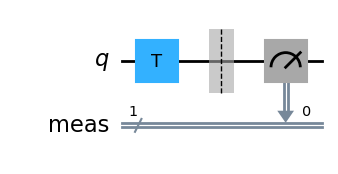

In [5]:
# 量子回路を準備
qc = QuantumCircuit(1)
qc.t(0)
qc.measure_all()

# 確認
qc.draw(output='mpl')

### Sダガーゲート
Z軸周りに-90度回転

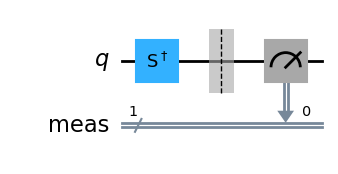

In [6]:
# 量子回路を準備
qc = QuantumCircuit(1)
qc.sdg(0)
qc.measure_all()

# 確認
qc.draw(output='mpl')

### Tダガーゲート
Z軸周りに-45度回転

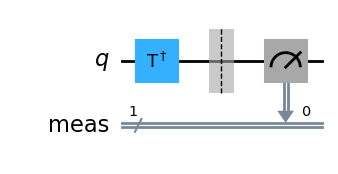

In [7]:
# 量子回路を準備
qc = QuantumCircuit(1)
qc.tdg(0)
qc.measure_all()

# 確認
qc.draw(output='mpl')

## 任意（にんい）回転ゲート
固定の角度ではなくて、自分で角度を決められるゲート

### RXゲート
X軸周りに好きな回転角度

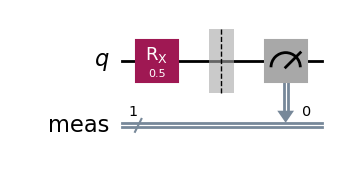

In [12]:
# 量子回路を準備
qc = QuantumCircuit(1)
qc.rx(0.5, 0)
qc.measure_all()

# 確認
qc.draw(output='mpl')

### RYゲート
Y軸周りに好きな回転角度

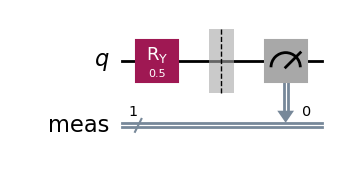

In [13]:
# 量子回路を準備
qc = QuantumCircuit(1)
qc.ry(0.5, 0)
qc.measure_all()

# 確認
qc.draw(output='mpl')

### RZゲート
Z軸周りに好きな回転角度

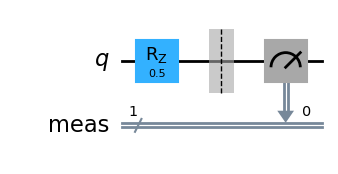

In [26]:
# 量子回路を準備
qc = QuantumCircuit(1)
qc.rz(0.5, 0)
qc.measure_all()

# 確認
qc.draw(output='mpl')

## 2量子ビットの計算
ここでは、最も有名なCX(CNOT)ゲートを学ぶ。シーエックスゲート、シーノットゲート。

CXゲートには２つの量子ビットにまたがって計算をするが、コントロールビットとターゲットビットの二つを区別する。

- コントロールビットの値が0の時、ターゲットビットには何もしない。
- コントロールビットの値が1の時、ターゲットビットにXゲートをかける。

| コントロールビット前 | ターゲットビット前 | コントロールビット後 | ターゲットビット後 |
| ---- | ---- | ---- | ---- |
| 0 | 0 | 0 | 0 |
| 0 | 1 | 0 | 1 |
| 1 | 0 | 1 | 1 |
| 1 | 1 | 1 | 0 |

こちらを量子回路で確認。2量子ビット準備して何もしないところにCXゲートをかけて計算結果を見る。

CXゲートは、 .cx(コントロールビット、ターゲットビット)の順番で記述する。


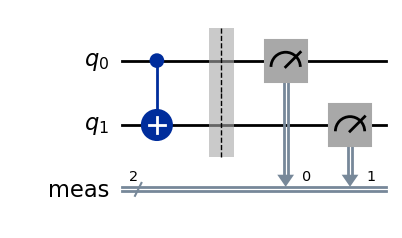

In [27]:
# 量子回路を準備。2量子ビット準備。
qc = QuantumCircuit(2)

##CXゲートをかける
qc.cx(0, 1)
qc.measure_all()

# 確認
qc.draw(output='mpl')

Counts: {'00': 1024}


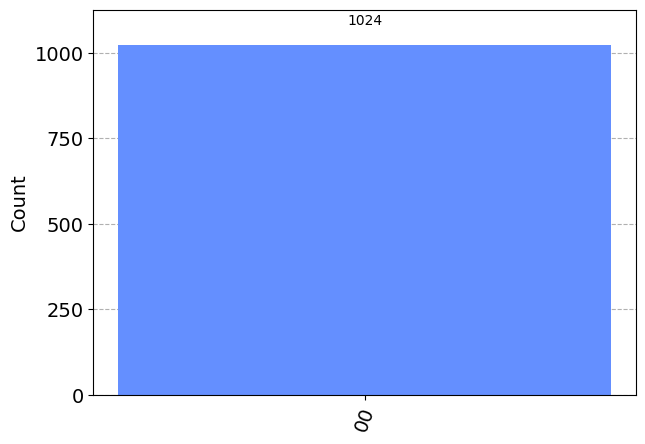

In [28]:
aersim = AerSimulator(method='statevector')

result = aersim.run(qc).result()
counts = result.get_counts(0)
print('Counts:', counts)

# 測定結果の頻度を棒グラフで表示
plot_histogram(counts)

答えは00になりました。
次にコントロールビットがわを1にしてみる。
Xゲートを使って1にする。

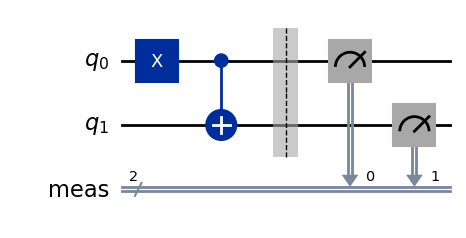

In [29]:
# 量子回路を準備。2量子ビット準備。
qc = QuantumCircuit(2)

#Xゲートをかける
qc.x(0)

#CXゲートをかける
qc.cx(0, 1)
qc.measure_all()

# 確認
qc.draw(output='mpl')

Counts: {'11': 1024}


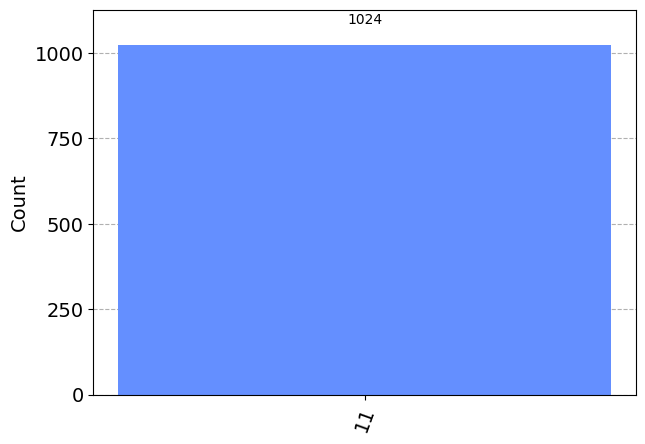

In [30]:
aersim = AerSimulator(method='statevector')

result = aersim.run(qc).result()
counts = result.get_counts(0)
print('Counts:', counts)

# 測定結果の頻度を棒グラフで表示
plot_histogram(counts)

ターゲットビットが反転して11になりました。次にコントロールビットを0、ターゲットビットを1にしてみる。

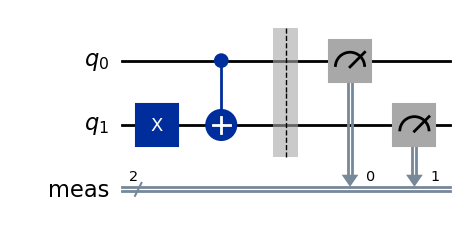

In [31]:
# 量子回路を準備。2量子ビット準備。
qc = QuantumCircuit(2)

#Xゲートをターゲットビットがわにかける
qc.x(1)

#CXゲートをかける
qc.cx(0, 1)
qc.measure_all()

# 確認
qc.draw(output='mpl')

Counts: {'10': 1024}


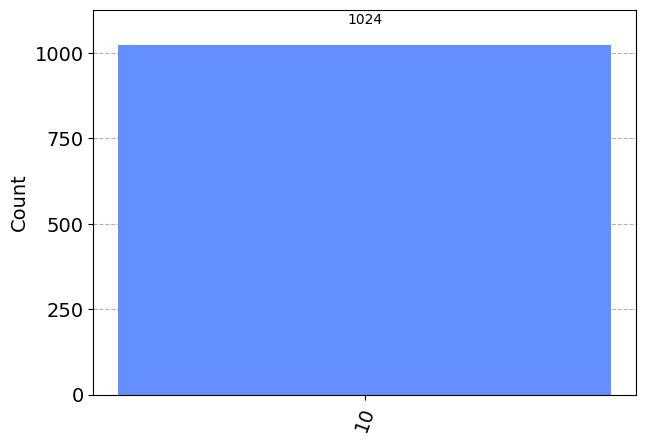

In [32]:
aersim = AerSimulator(method='statevector')

result = aersim.run(qc).result()
counts = result.get_counts(0)
print('Counts:', counts)

# 測定結果の頻度を棒グラフで表示
plot_histogram(counts)

次に、両方にXゲートをかけると、

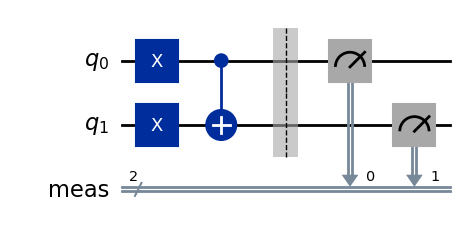

In [33]:
# 量子回路を準備。2量子ビット準備。
qc = QuantumCircuit(2)

#Xゲートをターゲットビットがわにかける
qc.x(0)
qc.x(1)

#CXゲートをかける
qc.cx(0, 1)
qc.measure_all()

# 確認
qc.draw(output='mpl')

Counts: {'01': 1024}


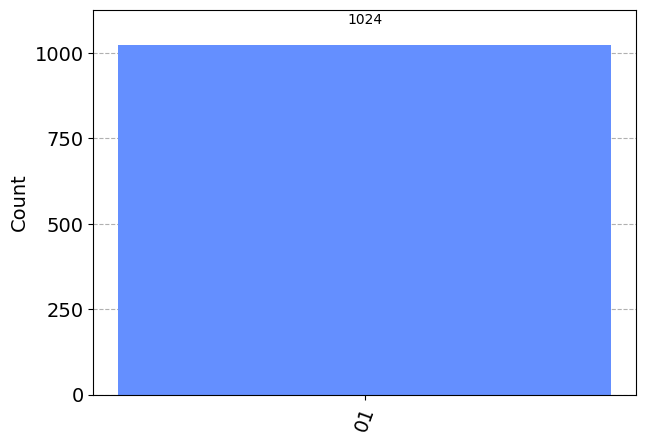

In [34]:
aersim = AerSimulator(method='statevector')

result = aersim.run(qc).result()
counts = result.get_counts(0)
print('Counts:', counts)

# 測定結果の頻度を棒グラフで表示
plot_histogram(counts)

ということでできました！